<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, regularizers, callbacks, models
from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import tensorflow as tf

SEED = 42
import random
random.seed(SEED)
tf.random.set_seed(SEED)

## Load the dataset

In [3]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_01/y_data.csv"

## Check dataset behaviour

In [4]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,0,1,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,0,1,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,0,1,0,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
X["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [64]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [65]:
X.shape

(7043, 25)

In [66]:
y.shape

(7043, 1)

### Split Data into Training, Validation, and Test Sets

In [5]:
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 25)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 25)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 25)
Shape of y_test: (1057, 1)


In [68]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [69]:
np.sum(y_val==0)

Churn    776
dtype: int64

In [6]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [7]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [8]:
X_train[0]

array([-0.39249775, -0.7678817 , -0.52045864, -0.9420036 ,  0.34861991,
       -0.79261028, -0.50930152, -0.61522083, -0.62055301, -0.52474004,
        1.32255288, -0.7471175 , -1.23309727,  0.41794038, -0.75926335,
       -0.67703088,  0.95669216, -0.44701491,  0.73059973, -0.46268835,
       -0.45961109, -0.50403625, -0.49468609,  1.24420893, -0.52817634])

In [73]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

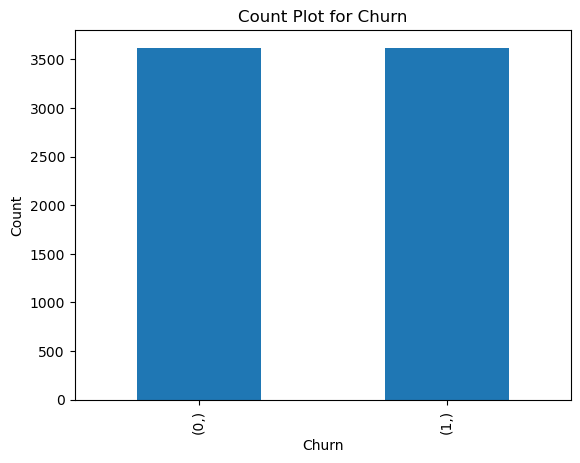

In [9]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

Text(0.5, 1.0, 'Count Plot for Churn')

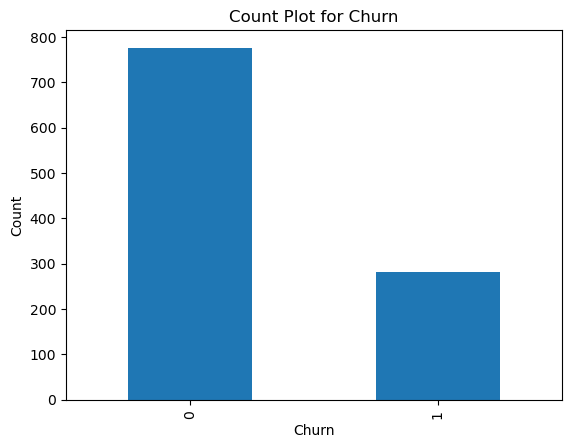

In [75]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [10]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()





## Train Neural Network

#### Experiment 01

In [11]:
input_dim=X_train.shape[1]
input_dim

25

In [12]:
from sklearn.utils.class_weight import compute_class_weight
y_train_flat = y.squeeze()        # turns (n,1) DataFrame into (n,) Series
y_train_flat = np.ravel(y_train_flat)  # ensures it's a 1D numpy array
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)
class_weights = {i: w for i, w in enumerate(class_weights)}
print("Class weights:", class_weights)

Class weights: {0: np.float64(0.6806146115191342), 1: np.float64(1.8841626538255751)}


In [13]:
def baseline_model_2(input_dim):

    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        
        # Feature extraction block 3
        layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dropout(0.3),
        
        # Feature extraction block 4
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        
        # Attention-like mechanism (simplified)
        layers.Dense(16, activation='relu'),
        
        
        layers.Dense(1, activation='sigmoid')
    ])

    return model

model=baseline_model_2(input_dim)
model.summary()


model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[keras.metrics.AUC(name='auc'), 'accuracy',
             keras.metrics.Precision(name='precision'),
             keras.metrics.Recall(name='recall')
            ]
)

callabacks_list = [
    callbacks.EarlyStopping(
        monitor='val_auc',
        patience=10,
        mode='max',
        restore_best_weights=True,
        verbose=1),

    callbacks.ReduceLROnPlateau(
        monitor='val_auc',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1),
    
    callbacks.ModelCheckpoint(
        filepath='best_model_3.h5',
        monitor='val_auc',
        mode='max',
        save_best_only=True,
        verbose=1)
]


history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=150,
    batch_size=512,
    callbacks=callabacks_list,
    verbose=2,
    class_weight=class_weights

)

c:\Users\chanu\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,289 (16.75 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150

Epoch 1: val_auc improved from None to 0.50863, saving model to best_model_3.h5


15/15 - 2s - 123ms/step - accuracy: 0.4983 - auc: 0.4423 - loss: 0.8320 - precision: 0.4991 - recall: 0.9042 - val_accuracy: 0.2992 - val_auc: 0.5086 - val_loss: 0.8192 - val_precision: 0.2718 - val_recall: 0.9786 - learning_rate: 1.0000e-04
Epoch 2/150

Epoch 2: val_auc improved from 0.50863 to 0.56279, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5019 - auc: 0.4635 - loss: 0.8147 - precision: 0.5010 - recall: 0.9326 - val_accuracy: 0.3030 - val_auc: 0.5628 - val_loss: 0.8217 - val_precision: 0.2743 - val_recall: 0.9893 - learning_rate: 1.0000e-04
Epoch 3/150

Epoch 3: val_auc improved from 0.56279 to 0.61302, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5059 - auc: 0.4980 - loss: 0.7949 - precision: 0.5031 - recall: 0.9561 - val_accuracy: 0.3021 - val_auc: 0.6130 - val_loss: 0.8245 - val_precision: 0.2744 - val_recall: 0.9929 - learning_rate: 1.0000e-04
Epoch 4/150

Epoch 4: val_auc improved from 0.61302 to 0.65651, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.5124 - auc: 0.5460 - loss: 0.7732 - precision: 0.5065 - recall: 0.9682 - val_accuracy: 0.3030 - val_auc: 0.6565 - val_loss: 0.8275 - val_precision: 0.2751 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 5/150

Epoch 5: val_auc improved from 0.65651 to 0.69071, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5139 - auc: 0.5799 - loss: 0.7555 - precision: 0.5073 - recall: 0.9749 - val_accuracy: 0.3030 - val_auc: 0.6907 - val_loss: 0.8310 - val_precision: 0.2751 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 6/150

Epoch 6: val_auc improved from 0.69071 to 0.71842, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5138 - auc: 0.6092 - loss: 0.7393 - precision: 0.5071 - recall: 0.9832 - val_accuracy: 0.3068 - val_auc: 0.7184 - val_loss: 0.8337 - val_precision: 0.2762 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 7/150

Epoch 7: val_auc improved from 0.71842 to 0.73923, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5173 - auc: 0.6381 - loss: 0.7246 - precision: 0.5089 - recall: 0.9848 - val_accuracy: 0.3116 - val_auc: 0.7392 - val_loss: 0.8365 - val_precision: 0.2776 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 8/150

Epoch 8: val_auc improved from 0.73923 to 0.75471, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5208 - auc: 0.6788 - loss: 0.7047 - precision: 0.5108 - recall: 0.9859 - val_accuracy: 0.3144 - val_auc: 0.7547 - val_loss: 0.8386 - val_precision: 0.2784 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 9/150

Epoch 9: val_auc improved from 0.75471 to 0.76685, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.5284 - auc: 0.7054 - loss: 0.6884 - precision: 0.5148 - recall: 0.9914 - val_accuracy: 0.3210 - val_auc: 0.7668 - val_loss: 0.8405 - val_precision: 0.2804 - val_recall: 0.9964 - learning_rate: 1.0000e-04
Epoch 10/150

Epoch 10: val_auc improved from 0.76685 to 0.77560, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.5246 - auc: 0.7176 - loss: 0.6801 - precision: 0.5128 - recall: 0.9856 - val_accuracy: 0.3248 - val_auc: 0.7756 - val_loss: 0.8412 - val_precision: 0.2802 - val_recall: 0.9857 - learning_rate: 1.0000e-04
Epoch 11/150

Epoch 11: val_auc improved from 0.77560 to 0.78217, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5287 - auc: 0.7310 - loss: 0.6699 - precision: 0.5150 - recall: 0.9884 - val_accuracy: 0.3438 - val_auc: 0.7822 - val_loss: 0.8405 - val_precision: 0.2856 - val_recall: 0.9821 - learning_rate: 1.0000e-04
Epoch 12/150

Epoch 12: val_auc improved from 0.78217 to 0.78666, saving model to best_model_3.h5


15/15 - 0s - 13ms/step - accuracy: 0.5353 - auc: 0.7451 - loss: 0.6603 - precision: 0.5186 - recall: 0.9856 - val_accuracy: 0.3475 - val_auc: 0.7867 - val_loss: 0.8400 - val_precision: 0.2863 - val_recall: 0.9786 - learning_rate: 1.0000e-04
Epoch 13/150

Epoch 13: val_auc improved from 0.78666 to 0.79071, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.5449 - auc: 0.7604 - loss: 0.6483 - precision: 0.5238 - recall: 0.9862 - val_accuracy: 0.3542 - val_auc: 0.7907 - val_loss: 0.8390 - val_precision: 0.2880 - val_recall: 0.9750 - learning_rate: 1.0000e-04
Epoch 14/150

Epoch 14: val_auc improved from 0.79071 to 0.79412, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5489 - auc: 0.7754 - loss: 0.6367 - precision: 0.5261 - recall: 0.9837 - val_accuracy: 0.3684 - val_auc: 0.7941 - val_loss: 0.8376 - val_precision: 0.2922 - val_recall: 0.9714 - learning_rate: 1.0000e-04
Epoch 15/150

Epoch 15: val_auc improved from 0.79412 to 0.79663, saving model to best_model_3.h5


15/15 - 0s - 10ms/step - accuracy: 0.5554 - auc: 0.7787 - loss: 0.6328 - precision: 0.5299 - recall: 0.9821 - val_accuracy: 0.3807 - val_auc: 0.7966 - val_loss: 0.8351 - val_precision: 0.2963 - val_recall: 0.9714 - learning_rate: 1.0000e-04
Epoch 16/150

Epoch 16: val_auc improved from 0.79663 to 0.79844, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.5566 - auc: 0.7941 - loss: 0.6199 - precision: 0.5306 - recall: 0.9812 - val_accuracy: 0.3968 - val_auc: 0.7984 - val_loss: 0.8319 - val_precision: 0.3014 - val_recall: 0.9679 - learning_rate: 1.0000e-04
Epoch 17/150

Epoch 17: val_auc improved from 0.79844 to 0.80090, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5654 - auc: 0.7939 - loss: 0.6167 - precision: 0.5359 - recall: 0.9779 - val_accuracy: 0.4233 - val_auc: 0.8009 - val_loss: 0.8279 - val_precision: 0.3107 - val_recall: 0.9643 - learning_rate: 1.0000e-04
Epoch 18/150

Epoch 18: val_auc improved from 0.80090 to 0.80269, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5792 - auc: 0.8017 - loss: 0.6083 - precision: 0.5442 - recall: 0.9752 - val_accuracy: 0.4422 - val_auc: 0.8027 - val_loss: 0.8237 - val_precision: 0.3172 - val_recall: 0.9571 - learning_rate: 1.0000e-04
Epoch 19/150

Epoch 19: val_auc improved from 0.80269 to 0.80374, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5918 - auc: 0.8070 - loss: 0.6025 - precision: 0.5521 - recall: 0.9727 - val_accuracy: 0.4782 - val_auc: 0.8037 - val_loss: 0.8190 - val_precision: 0.3313 - val_recall: 0.9500 - learning_rate: 1.0000e-04
Epoch 20/150

Epoch 20: val_auc improved from 0.80374 to 0.80454, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.5995 - auc: 0.8146 - loss: 0.5936 - precision: 0.5571 - recall: 0.9716 - val_accuracy: 0.4943 - val_auc: 0.8045 - val_loss: 0.8142 - val_precision: 0.3372 - val_recall: 0.9393 - learning_rate: 1.0000e-04
Epoch 21/150

Epoch 21: val_auc improved from 0.80454 to 0.80573, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.6154 - auc: 0.8161 - loss: 0.5900 - precision: 0.5676 - recall: 0.9694 - val_accuracy: 0.5208 - val_auc: 0.8057 - val_loss: 0.8085 - val_precision: 0.3485 - val_recall: 0.9286 - learning_rate: 1.0000e-04
Epoch 22/150

Epoch 22: val_auc improved from 0.80573 to 0.80680, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.6233 - auc: 0.8203 - loss: 0.5839 - precision: 0.5739 - recall: 0.9575 - val_accuracy: 0.5436 - val_auc: 0.8068 - val_loss: 0.8027 - val_precision: 0.3597 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 23/150

Epoch 23: val_auc improved from 0.80680 to 0.80741, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.6349 - auc: 0.8240 - loss: 0.5788 - precision: 0.5818 - recall: 0.9594 - val_accuracy: 0.5634 - val_auc: 0.8074 - val_loss: 0.7981 - val_precision: 0.3705 - val_recall: 0.9250 - learning_rate: 1.0000e-04
Epoch 24/150

Epoch 24: val_auc improved from 0.80741 to 0.80834, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.6484 - auc: 0.8295 - loss: 0.5711 - precision: 0.5921 - recall: 0.9542 - val_accuracy: 0.5805 - val_auc: 0.8083 - val_loss: 0.7931 - val_precision: 0.3793 - val_recall: 0.9143 - learning_rate: 1.0000e-04
Epoch 25/150

Epoch 25: val_auc improved from 0.80834 to 0.80895, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.6572 - auc: 0.8334 - loss: 0.5667 - precision: 0.5987 - recall: 0.9539 - val_accuracy: 0.5947 - val_auc: 0.8089 - val_loss: 0.7892 - val_precision: 0.3862 - val_recall: 0.8964 - learning_rate: 1.0000e-04
Epoch 26/150

Epoch 26: val_auc improved from 0.80895 to 0.80994, saving model to best_model_3.h5


15/15 - 0s - 15ms/step - accuracy: 0.6748 - auc: 0.8296 - loss: 0.5684 - precision: 0.6120 - recall: 0.9547 - val_accuracy: 0.6098 - val_auc: 0.8099 - val_loss: 0.7840 - val_precision: 0.3959 - val_recall: 0.8964 - learning_rate: 1.0000e-04
Epoch 27/150

Epoch 27: val_auc improved from 0.80994 to 0.81063, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.6804 - auc: 0.8385 - loss: 0.5570 - precision: 0.6169 - recall: 0.9520 - val_accuracy: 0.6174 - val_auc: 0.8106 - val_loss: 0.7784 - val_precision: 0.4010 - val_recall: 0.8964 - learning_rate: 1.0000e-04
Epoch 28/150

Epoch 28: val_auc improved from 0.81063 to 0.81101, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.6850 - auc: 0.8382 - loss: 0.5547 - precision: 0.6219 - recall: 0.9440 - val_accuracy: 0.6297 - val_auc: 0.8110 - val_loss: 0.7727 - val_precision: 0.4095 - val_recall: 0.8964 - learning_rate: 1.0000e-04
Epoch 29/150

Epoch 29: val_auc improved from 0.81101 to 0.81187, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.6927 - auc: 0.8362 - loss: 0.5559 - precision: 0.6292 - recall: 0.9387 - val_accuracy: 0.6354 - val_auc: 0.8119 - val_loss: 0.7681 - val_precision: 0.4132 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 30/150

Epoch 30: val_auc improved from 0.81187 to 0.81235, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7028 - auc: 0.8415 - loss: 0.5473 - precision: 0.6379 - recall: 0.9382 - val_accuracy: 0.6430 - val_auc: 0.8124 - val_loss: 0.7635 - val_precision: 0.4188 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 31/150

Epoch 31: val_auc improved from 0.81235 to 0.81295, saving model to best_model_3.h5


15/15 - 0s - 10ms/step - accuracy: 0.7024 - auc: 0.8380 - loss: 0.5512 - precision: 0.6378 - recall: 0.9365 - val_accuracy: 0.6487 - val_auc: 0.8130 - val_loss: 0.7586 - val_precision: 0.4228 - val_recall: 0.8893 - learning_rate: 1.0000e-04
Epoch 32/150

Epoch 32: val_auc improved from 0.81295 to 0.81334, saving model to best_model_3.h5


15/15 - 0s - 7ms/step - accuracy: 0.7165 - auc: 0.8440 - loss: 0.5422 - precision: 0.6516 - recall: 0.9304 - val_accuracy: 0.6562 - val_auc: 0.8133 - val_loss: 0.7561 - val_precision: 0.4288 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 33/150

Epoch 33: val_auc improved from 0.81334 to 0.81383, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7182 - auc: 0.8421 - loss: 0.5440 - precision: 0.6529 - recall: 0.9321 - val_accuracy: 0.6610 - val_auc: 0.8138 - val_loss: 0.7532 - val_precision: 0.4325 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 34/150

Epoch 34: val_auc improved from 0.81383 to 0.81413, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7263 - auc: 0.8434 - loss: 0.5410 - precision: 0.6595 - recall: 0.9354 - val_accuracy: 0.6629 - val_auc: 0.8141 - val_loss: 0.7492 - val_precision: 0.4340 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 35/150

Epoch 35: val_auc improved from 0.81413 to 0.81423, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7321 - auc: 0.8525 - loss: 0.5272 - precision: 0.6659 - recall: 0.9313 - val_accuracy: 0.6667 - val_auc: 0.8142 - val_loss: 0.7447 - val_precision: 0.4371 - val_recall: 0.8929 - learning_rate: 1.0000e-04
Epoch 36/150

Epoch 36: val_auc improved from 0.81423 to 0.81457, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7318 - auc: 0.8521 - loss: 0.5279 - precision: 0.6669 - recall: 0.9260 - val_accuracy: 0.6657 - val_auc: 0.8146 - val_loss: 0.7403 - val_precision: 0.4359 - val_recall: 0.8857 - learning_rate: 1.0000e-04
Epoch 37/150

Epoch 37: val_auc improved from 0.81457 to 0.81506, saving model to best_model_3.h5


15/15 - 0s - 11ms/step - accuracy: 0.7376 - auc: 0.8536 - loss: 0.5240 - precision: 0.6719 - recall: 0.9288 - val_accuracy: 0.6657 - val_auc: 0.8151 - val_loss: 0.7366 - val_precision: 0.4356 - val_recall: 0.8821 - learning_rate: 1.0000e-04
Epoch 38/150

Epoch 38: val_auc improved from 0.81506 to 0.81572, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7442 - auc: 0.8541 - loss: 0.5235 - precision: 0.6783 - recall: 0.9290 - val_accuracy: 0.6667 - val_auc: 0.8157 - val_loss: 0.7343 - val_precision: 0.4359 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 39/150

Epoch 39: val_auc improved from 0.81572 to 0.81581, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7446 - auc: 0.8533 - loss: 0.5228 - precision: 0.6790 - recall: 0.9279 - val_accuracy: 0.6686 - val_auc: 0.8158 - val_loss: 0.7336 - val_precision: 0.4375 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 40/150

Epoch 40: val_auc improved from 0.81581 to 0.81613, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7461 - auc: 0.8564 - loss: 0.5188 - precision: 0.6805 - recall: 0.9279 - val_accuracy: 0.6686 - val_auc: 0.8161 - val_loss: 0.7327 - val_precision: 0.4375 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 41/150

Epoch 41: val_auc improved from 0.81613 to 0.81652, saving model to best_model_3.h5


15/15 - 0s - 18ms/step - accuracy: 0.7401 - auc: 0.8502 - loss: 0.5268 - precision: 0.6778 - recall: 0.9152 - val_accuracy: 0.6723 - val_auc: 0.8165 - val_loss: 0.7291 - val_precision: 0.4406 - val_recall: 0.8750 - learning_rate: 1.0000e-04
Epoch 42/150

Epoch 42: val_auc improved from 0.81652 to 0.81670, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7471 - auc: 0.8559 - loss: 0.5177 - precision: 0.6828 - recall: 0.9230 - val_accuracy: 0.6733 - val_auc: 0.8167 - val_loss: 0.7257 - val_precision: 0.4410 - val_recall: 0.8679 - learning_rate: 1.0000e-04
Epoch 43/150

Epoch 43: val_auc improved from 0.81670 to 0.81679, saving model to best_model_3.h5


15/15 - 0s - 10ms/step - accuracy: 0.7489 - auc: 0.8576 - loss: 0.5146 - precision: 0.6848 - recall: 0.9221 - val_accuracy: 0.6733 - val_auc: 0.8168 - val_loss: 0.7232 - val_precision: 0.4408 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 44/150

Epoch 44: val_auc improved from 0.81679 to 0.81693, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7504 - auc: 0.8532 - loss: 0.5205 - precision: 0.6858 - recall: 0.9244 - val_accuracy: 0.6771 - val_auc: 0.8169 - val_loss: 0.7191 - val_precision: 0.4440 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 45/150

Epoch 45: val_auc improved from 0.81693 to 0.81725, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7494 - auc: 0.8597 - loss: 0.5112 - precision: 0.6852 - recall: 0.9230 - val_accuracy: 0.6761 - val_auc: 0.8172 - val_loss: 0.7177 - val_precision: 0.4432 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 46/150

Epoch 46: val_auc improved from 0.81725 to 0.81743, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7497 - auc: 0.8565 - loss: 0.5153 - precision: 0.6865 - recall: 0.9194 - val_accuracy: 0.6771 - val_auc: 0.8174 - val_loss: 0.7152 - val_precision: 0.4440 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 47/150

Epoch 47: val_auc improved from 0.81743 to 0.81756, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7523 - auc: 0.8565 - loss: 0.5159 - precision: 0.6895 - recall: 0.9183 - val_accuracy: 0.6799 - val_auc: 0.8176 - val_loss: 0.7138 - val_precision: 0.4465 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 48/150

Epoch 48: val_auc improved from 0.81756 to 0.81764, saving model to best_model_3.h5


15/15 - 0s - 12ms/step - accuracy: 0.7511 - auc: 0.8561 - loss: 0.5140 - precision: 0.6867 - recall: 0.9235 - val_accuracy: 0.6809 - val_auc: 0.8176 - val_loss: 0.7114 - val_precision: 0.4473 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 49/150

Epoch 49: val_auc did not improve from 0.81764
15/15 - 0s - 7ms/step - accuracy: 0.7535 - auc: 0.8607 - loss: 0.5077 - precision: 0.6902 - recall: 0.9197 - val_accuracy: 0.6809 - val_auc: 0.8176 - val_loss: 0.7103 - val_precision: 0.4473 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 50/150

Epoch 50: val_auc improved from 0.81764 to 0.81778, saving model to best_model_3.h5


15/15 - 0s - 8ms/step - accuracy: 0.7599 - auc: 0.8599 - loss: 0.5081 - precision: 0.6953 - recall: 0.9255 - val_accuracy: 0.6809 - val_auc: 0.8178 - val_loss: 0.7086 - val_precision: 0.4473 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 51/150

Epoch 51: val_auc improved from 0.81778 to 0.81809, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7540 - auc: 0.8602 - loss: 0.5096 - precision: 0.6909 - recall: 0.9194 - val_accuracy: 0.6790 - val_auc: 0.8181 - val_loss: 0.7061 - val_precision: 0.4455 - val_recall: 0.8607 - learning_rate: 1.0000e-04
Epoch 52/150

Epoch 52: val_auc improved from 0.81809 to 0.81829, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7529 - auc: 0.8610 - loss: 0.5063 - precision: 0.6900 - recall: 0.9186 - val_accuracy: 0.6790 - val_auc: 0.8183 - val_loss: 0.7044 - val_precision: 0.4455 - val_recall: 0.8607 - learning_rate: 1.0000e-04
Epoch 53/150

Epoch 53: val_auc did not improve from 0.81829
15/15 - 0s - 8ms/step - accuracy: 0.7619 - auc: 0.8584 - loss: 0.5097 - precision: 0.6988 - recall: 0.9205 - val_accuracy: 0.6780 - val_auc: 0.8182 - val_loss: 0.7035 - val_precision: 0.4446 - val_recall: 0.8607 - learning_rate: 1.0000e-04
Epoch 54/150

Epoch 54: val_auc did not improve from 0.81829
15/15 - 0s - 7ms/step - accuracy: 0.7642 - auc: 0.8623 - loss: 0.5037 - precision: 0.7006 - recall: 0.9227 - val_accuracy: 0.6799 - val_auc: 0.8181 - val_loss: 0.7027 - val_precision: 0.4465 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 55/150

Epoch 55: val_auc did not improve from 0.81829
15/15 - 0s - 6ms/step - accuracy: 0.7583 - auc: 0.8616 - loss: 0.5054 - precision: 0.6953 - recal

15/15 - 0s - 8ms/step - accuracy: 0.7580 - auc: 0.8659 - loss: 0.4979 - precision: 0.6946 - recall: 0.9210 - val_accuracy: 0.6837 - val_auc: 0.8183 - val_loss: 0.6999 - val_precision: 0.4500 - val_recall: 0.8679 - learning_rate: 1.0000e-04
Epoch 60/150

Epoch 60: val_auc did not improve from 0.81834
15/15 - 0s - 7ms/step - accuracy: 0.7570 - auc: 0.8648 - loss: 0.4998 - precision: 0.6945 - recall: 0.9177 - val_accuracy: 0.6847 - val_auc: 0.8183 - val_loss: 0.6982 - val_precision: 0.4508 - val_recall: 0.8679 - learning_rate: 1.0000e-04
Epoch 61/150

Epoch 61: val_auc did not improve from 0.81834
15/15 - 0s - 6ms/step - accuracy: 0.7615 - auc: 0.8641 - loss: 0.4990 - precision: 0.6980 - recall: 0.9216 - val_accuracy: 0.6837 - val_auc: 0.8183 - val_loss: 0.6975 - val_precision: 0.4498 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 62/150

Epoch 62: val_auc improved from 0.81834 to 0.81841, saving model to best_model_3.h5


15/15 - 0s - 9ms/step - accuracy: 0.7602 - auc: 0.8654 - loss: 0.4988 - precision: 0.6967 - recall: 0.9216 - val_accuracy: 0.6837 - val_auc: 0.8184 - val_loss: 0.6976 - val_precision: 0.4498 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 63/150

Epoch 63: val_auc did not improve from 0.81841
15/15 - 0s - 15ms/step - accuracy: 0.7627 - auc: 0.8638 - loss: 0.5001 - precision: 0.6993 - recall: 0.9219 - val_accuracy: 0.6837 - val_auc: 0.8184 - val_loss: 0.6972 - val_precision: 0.4498 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 64/150

Epoch 64: val_auc did not improve from 0.81841
15/15 - 0s - 7ms/step - accuracy: 0.7604 - auc: 0.8662 - loss: 0.4956 - precision: 0.6963 - recall: 0.9235 - val_accuracy: 0.6837 - val_auc: 0.8182 - val_loss: 0.6953 - val_precision: 0.4498 - val_recall: 0.8643 - learning_rate: 1.0000e-04
Epoch 65/150

Epoch 65: val_auc did not improve from 0.81841
15/15 - 0s - 7ms/step - accuracy: 0.7608 - auc: 0.8661 - loss: 0.4947 - precision: 0.6975 - reca

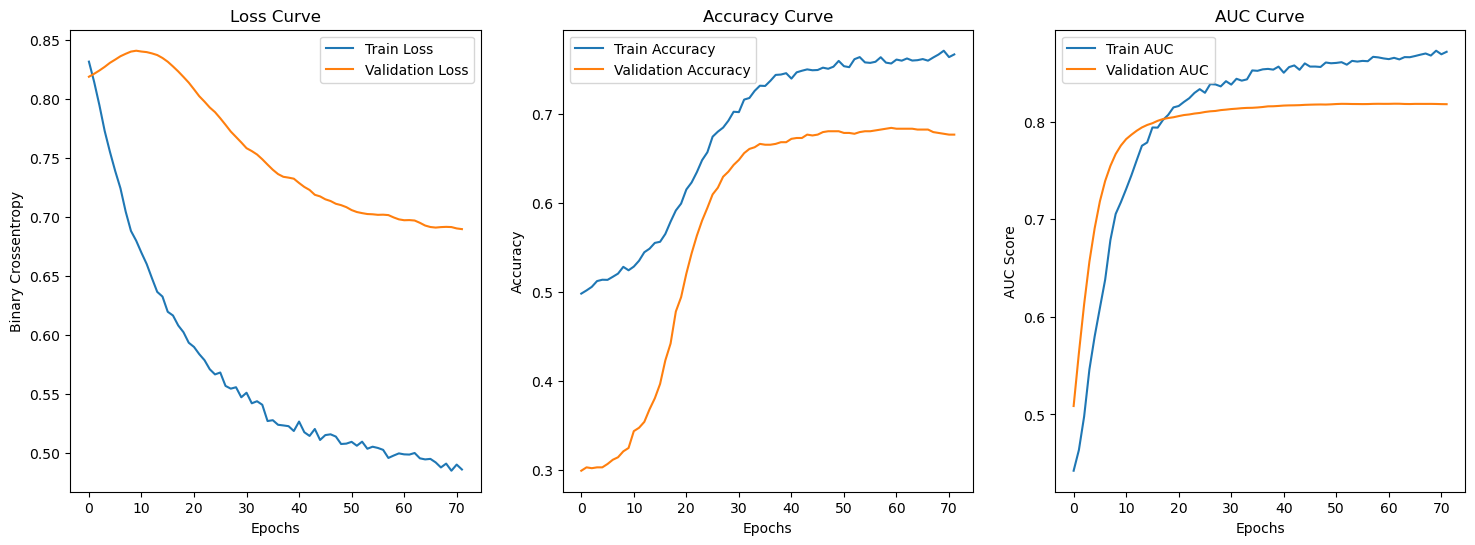

In [14]:
plot_history(history)

In [15]:
best_model_2 = keras.models.load_model('best_model_3.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)


test_loss     = test_results[0]
test_auc      = test_results[1]
test_accuracy = test_results[2]
test_precision = test_results[3]
test_recall    = test_results[4]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, (model.predict(X_test) >= 0.79).astype(int)))

train_accuracy = history.history['accuracy'][-1]
val_accuracy   = history.history['val_accuracy']
train_loss     = history.history['loss']
val_loss       = history.history['val_loss']
train_auc= roc_auc_score(y_train, best_model_2.predict(X_train))

train_precision = history.history['precision'][-1]
train_recall = history.history['recall'][-1]

print(" Training Accuracy:", train_accuracy)
print(" Validation Accuracy:", val_accuracy[-1])
print(" Training Loss:", train_loss[-1])
print(" Validation Loss:", val_loss[-1])
print(" Train AUC:", train_auc)
print(" Train Precision:", train_precision)
print(" Train Recall:", train_recall)

Test Loss: 0.6514
Test AUC: 0.8306
Test Accuracy: 0.6944
Test Precision: 0.4605
Test Recall: 0.8719

Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       776
           1       0.58      0.62      0.60       281

    accuracy                           0.78      1057
   macro avg       0.72      0.73      0.73      1057
weighted avg       0.79      0.78      0.78      1057

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step
 Training Accuracy: 0.7672556638717651
 Validation Accuracy: 0.6770833134651184
 Training Loss: 0.48612329363822937
 Validation Loss: 0.6899462342262268
 Train AUC: 0.8850197166161391
 Train Precision: 0.7021721005439758
 Train Recall: 0.9282164573669434


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


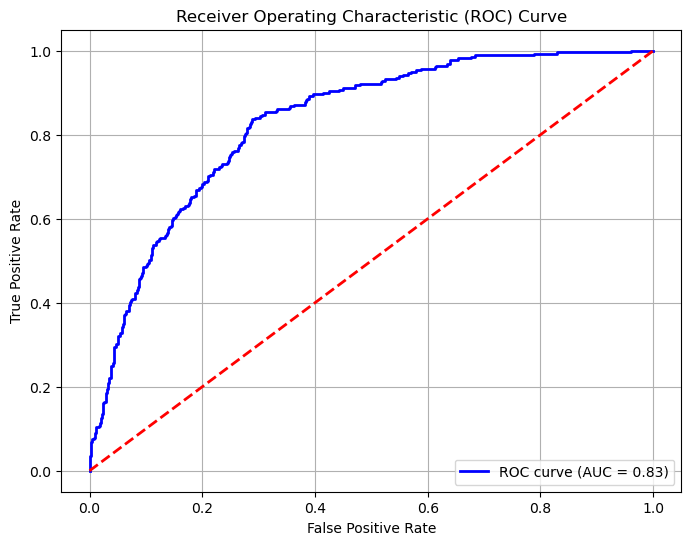

In [16]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(45.722222222222214, 0.5, 'True Label')

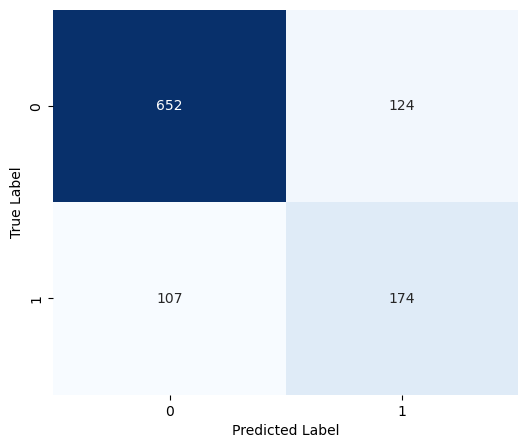

In [17]:
cm=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.79).astype(int))
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')